In [ ]:
def make_random_mv_timeseries(time, funcs, mean_shift=1, freq_shift=.01, noise_level=.1, seed=None):
    """Make a single multivariate time series.
    Parameters
    ----------
    time : array-like, shape (n_samples,)
        Time points.
    funcs : list of callables
        List of functions to generate the time series.
    mean_shift : float, default=1
        Whether to add a mean shift to the time series.
    phase_shift : float, default=0.1 
        Whether to add a phase shift to the time series.
    noise_level : float, default=0.1  
        Amount of noise to add to the time series.
    seed : int, default=None
        Random seed.
    """
    
    if seed is None:
        seed = np.random.randint(0, 10000)
    np.random.seed(seed)

    X = np.empty((len(funcs), len(times)))
    for i, func in enumerate(funcs):

        x = func(times*np.random.randn(1)*freq_shift)

        if mean_shift:
            x += np.random.uniform(-mean_shift, mean_shift, 1)
        if noise_level:
            x += np.random.randn(len(times))*noise_level
        
        X[i] = x
    
    return X

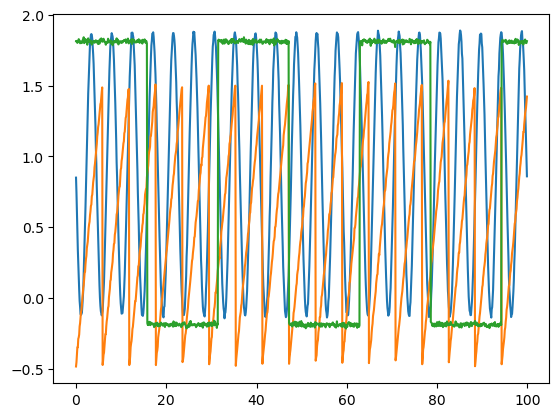

In [ ]:
x = make_random_mv_timeseries(times, [np.sin, sig.sawtooth, sig.square], mean_shift=1, freq_shift=1, noise_level=.01, seed=None)
plt.plot(times, x.T)
plt.show()

In [ ]:
def make_mv_timeseries(time, funcs, mean_shift=1, freq_shift=.01, noise_level=.1, seed=None):
    """Make a single multivariate time series.
    Parameters
    ----------
    time : array-like, shape (n_samples,)
        Time points.
    funcs : list of callables
        List of functions to generate the time series.
    mean_shift : float, default=1
        Whether to add a mean shift to the time series.
    phase_shift : float, default=0.1 
        Whether to add a phase shift to the time series.
    noise_level : float, default=0.1  
        Amount of noise to add to the time series.
    seed : int, default=None
        Random seed.
    """
    
    if seed is None:
        seed = np.random.randint(0, 10000)
    np.random.seed(seed)

    X = np.empty((len(funcs), len(times)))
    for i, func in enumerate(funcs):

        x = func(times*freq_shift)

        if mean_shift:
            x += mean_shift
        if noise_level:
            x += np.random.randn(len(times))*noise_level
        
        X[i] = x
    
    return X

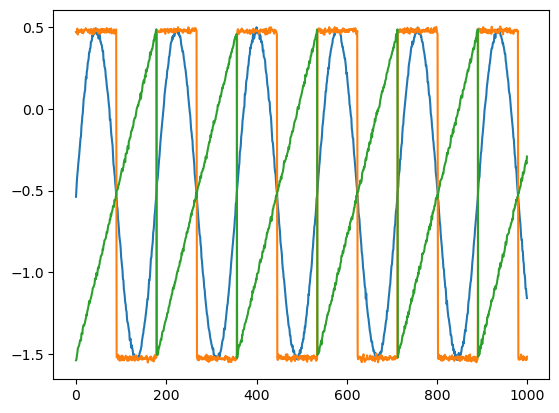

In [ ]:
freq_shift_range = 1
mean_shift_range = 1
noise_level = .01
freq_shift = np.random.randn(1)*freq_shift_range
mean_shift = np.random.uniform(-mean_shift_range, mean_shift_range, 1)
x = make_mv_timeseries(times, [np.sin, sig.square, sig.sawtooth], mean_shift=mean_shift, freq_shift=freq_shift, noise_level=noise_level)
plt.plot(x.T)
plt.show()

In [ ]:
def make_mv_timeseries_class(n_samples, time, funcs, mean_shift=1, freq_shift=.01, noise_level=.1, seed=None):
    """Make a multivariate time series dataset.
    Parameters
    ----------
    n_samples : int
        Number of samples to generate.
    time : array-like, shape (n_samples,)
        Time points.
    funcs : list of callables
        List of functions to generate the time series.
    mean_shift : float, default=1
        Whether to add a mean shift to the time series.
    phase_shift : float, default=0.1 
        Whether to add a phase shift to the time series.
    noise_level : float, default=0.1  
        Amount of noise to add to the time series.
    seed : int, default=None
        Random seed.
    """
    
    if seed is None:
        seed = np.random.randint(0, 10000)
    np.random.seed(seed)

    X = np.empty((n_samples, len(funcs), len(times)))
    for i in range(n_samples):
        X[i] = make_mv_timeseries(time, funcs, mean_shift, freq_shift, noise_level, seed+i)
    
    return X

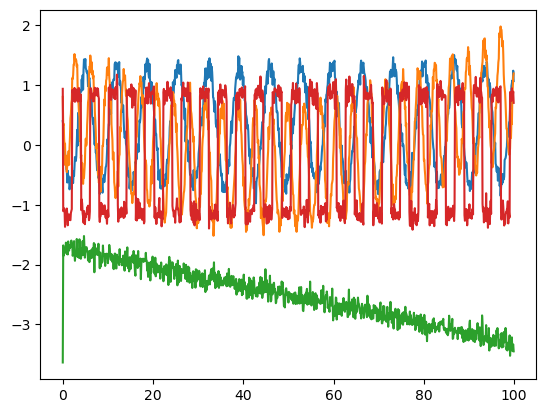

In [ ]:
x = make_mv_timeseries(times, [np.sin,lambda x: np.sin(x) + np.sin(x*.02), sig.sawtooth, sig.square], mean_shift=.0001,noise_level=0.1, freq_shift=1)
plt.plot(times, x.T)
plt.show()